<a href="https://colab.research.google.com/github/engSalah-dot/Machine-Learning-from-scratch-to-advanced/blob/main/Heart%20Disease%20Prediction%20using%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


**Loading Dataset**

In [79]:
heart_data=pd.read_csv('/content/heart_disease_data.csv')
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [80]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [82]:
heart_data.shape

(303, 14)

In [83]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [84]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [85]:
missing_values=heart_data.isnull().sum()
missing_values

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [86]:
heart_data['target'].value_counts()

,count
target,
1,165
0,138


**Splitting target column from features columns**

In [87]:
X=heart_data.drop(columns='target',axis=1)
Y=heart_data['target']

**Training Data**

In [88]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [89]:
X.shape,x_train.shape,x_test.shape

((303, 13), (242, 13), (61, 13))

# **Model Training with Logistic Regression**

In [90]:
model=LogisticRegression()
model.fit(x_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **Model Evaluation**

In [91]:
y_predict=model.predict(x_train)
accuracy=accuracy_score(y_train,y_predict)
accuracy

0.8512396694214877

In [92]:
y_predict_test=model.predict(x_test)
accuracy=accuracy_score(y_test,y_predict_test)
accuracy

0.819672131147541

# **Heatmap of model**

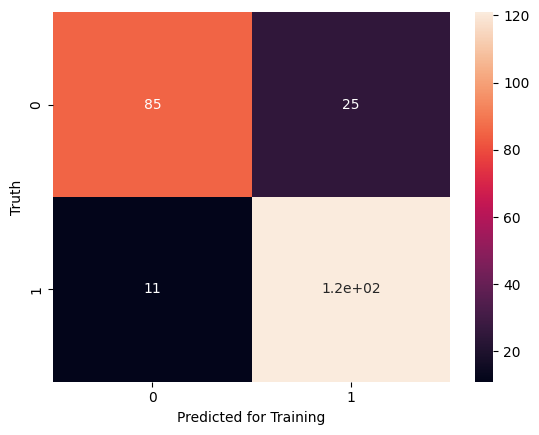

In [93]:
sns.heatmap(confusion_matrix(y_train,y_predict),annot=True)

plt.xlabel('Predicted for Training')
plt.ylabel('Truth')
plt.show()

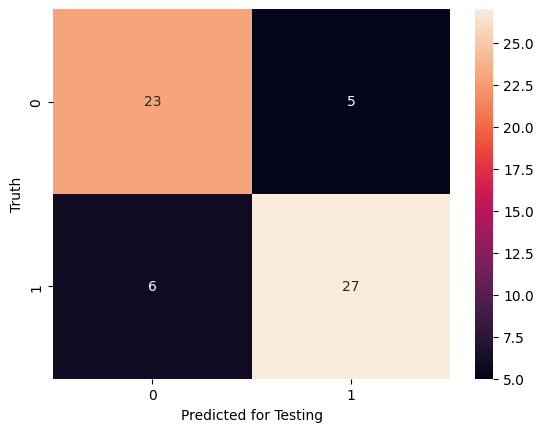

In [94]:
sns.heatmap(confusion_matrix(y_test,y_predict_test),annot=True)
plt.xlabel('Predicted for Testing')
plt.ylabel('Truth')
plt.show()

## **Make A Prediction System**

In [95]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Standardization

In [113]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
Scaled=StandardScaler()
X_train_scaled=Scaled.fit_transform(X_train)
X_test_scaled=Scaled.transform(X_test)
model=LogisticRegression()
model.fit(X_train_scaled,Y_train)
Y_predict=model.predict(X_test_scaled)
accuracy=accuracy_score(Y_test,Y_predict)
accuracy

0.8688524590163934

[[21  7]
 [ 7 26]]
0.7704918032786885
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



([<matplotlib.axis.XTick at 0x79e0b85be710>,
 [Text(0, 0, 'f 2'),
  Text(1, 0, 'f 11'),
  Text(2, 0, 'f 12'),
  Text(3, 0, 'f 4'),
  Text(4, 0, 'f 6'),
  Text(5, 0, 'f 0'),
  Text(6, 0, 'f 3'),
  Text(7, 0, 'f 7'),
  Text(8, 0, 'f 10'),
  Text(9, 0, 'f 8'),
  Text(10, 0, 'f 1'),
  Text(11, 0, 'f 9'),
  Text(12, 0, 'f 5')])

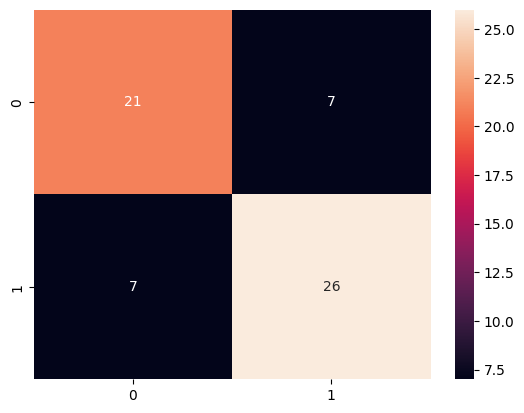

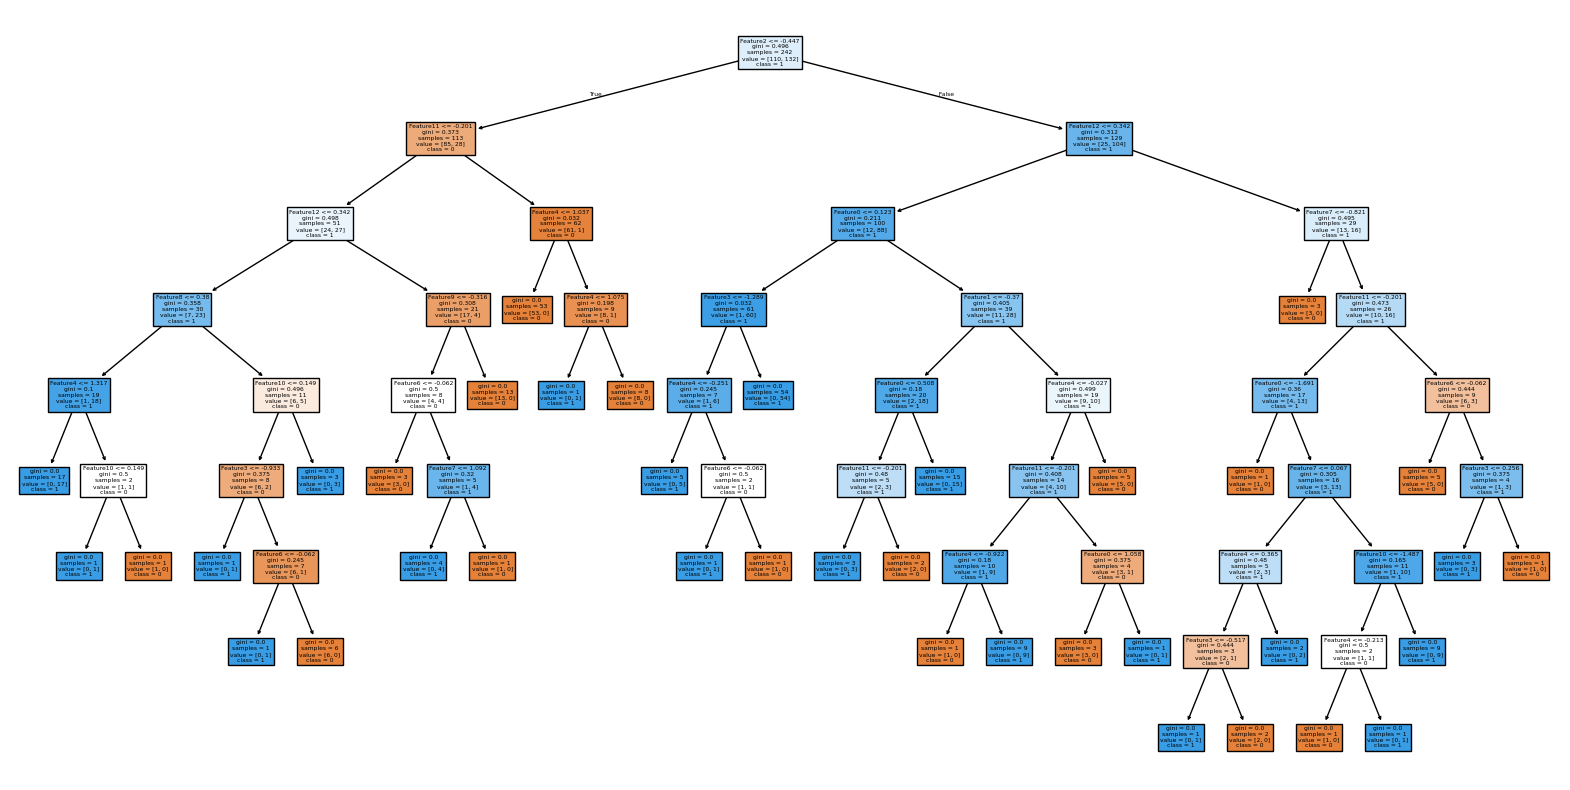

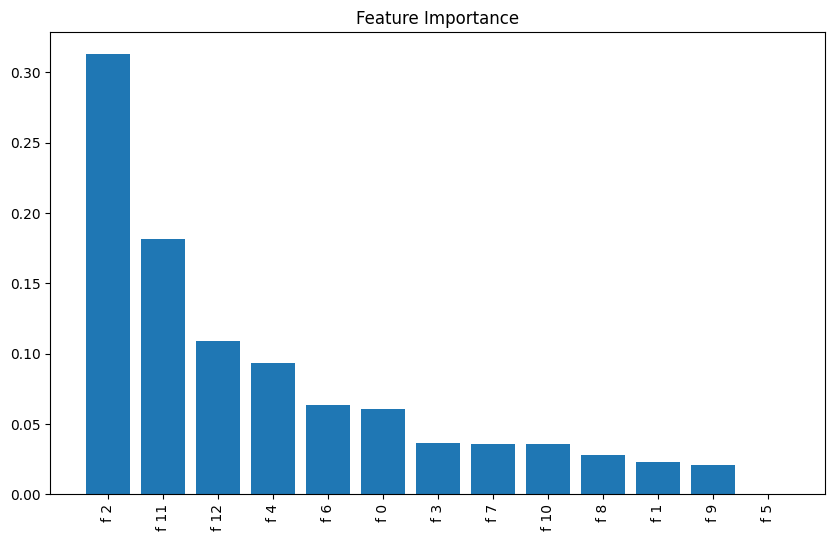

In [97]:
model3=DecisionTreeClassifier()
model3.fit(X_train_scaled,Y_train)
Y_predict=model3.predict(X_test_scaled)
accuracy=accuracy_score(Y_test,Y_predict)
sns.heatmap(confusion_matrix(Y_test,Y_predict),annot=True)
print(confusion_matrix(Y_test,Y_predict))
print(accuracy_score(Y_test,Y_predict))
print(classification_report(Y_test,Y_predict))
plt.figure(figsize=(20,10))
plot_tree(model3,filled=True,feature_names=[f'Feature{i}'for i in range(20)],class_names=['0','1'])
importance=model3.feature_importances_
indcies=np.argsort(importance)[::-1]
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(len(indcies)),importance[indcies])
plt.xticks(range(len(indcies)),[f'f {i}'for i in indcies],rotation=90)


0.9180327868852459
[[27  5]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.92        32
           1       0.85      1.00      0.92        29

    accuracy                           0.92        61
   macro avg       0.93      0.92      0.92        61
weighted avg       0.93      0.92      0.92        61



([<matplotlib.axis.XTick at 0x79e0b75dbb10>,
 [Text(0, 0, 'f 7'),
  Text(1, 0, 'f 2'),
  Text(2, 0, 'f 9'),
  Text(3, 0, 'f 11'),
  Text(4, 0, 'f 0'),
  Text(5, 0, 'f 12'),
  Text(6, 0, 'f 4'),
  Text(7, 0, 'f 3'),
  Text(8, 0, 'f 10'),
  Text(9, 0, 'f 8'),
  Text(10, 0, 'f 1'),
  Text(11, 0, 'f 6'),
  Text(12, 0, 'f 5')])

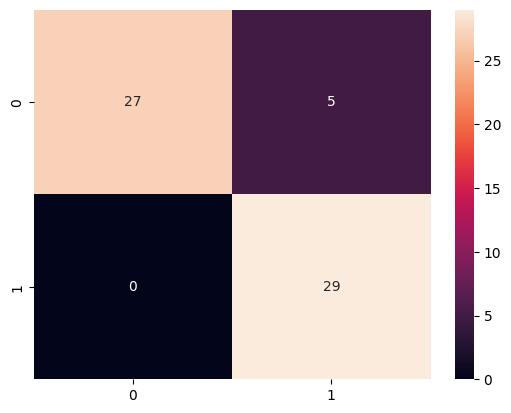

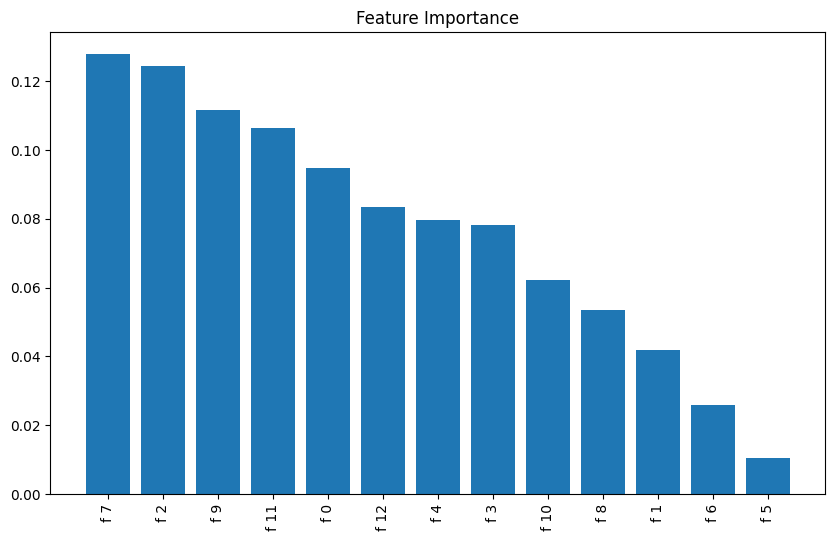

In [114]:
model5=RandomForestClassifier(n_estimators=100,random_state=42)
model5.fit(X_train_scaled,Y_train)
y_predict5=model5.predict(X_test_scaled)
print(accuracy_score(Y_test,y_predict5))
print(confusion_matrix(Y_test,y_predict5))
print(classification_report(Y_test,y_predict5))
sns.heatmap(confusion_matrix(Y_test,y_predict5),annot=True)
importance=model5.feature_importances_
indcies=np.argsort(importance)[::-1]
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(len(indcies)),importance[indcies])
plt.xticks(range(len(indcies)),[f'f {i}'for i in indcies],rotation=90)